In [ ]:
# Run this cell to ensure all libraries are installed.
pip install matplotlib numpy ipywidgets pillow ipython

In [62]:
# Title cell
from IPython.display import HTML
html_title = """
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Computational Physics Prize 2024: Modelling Rainbows</title>
  <link href="https://fonts.googleapis.com/css2?family=Lobster&display=swap" rel="stylesheet">
  <style>
    body {
      font-family: 'Lobster', cursive;
    }
    h1, h2 {
      margin: 0;
      font-family: 'Courier', monospace;
    }
    p {
      margin: 0;
      font-family: 'Courier', monospace;
    }
  </style>
  <script src="https://polyfill.io/v3/polyfill.min.js?features=es6"></script>
  <script id="MathJax-script" async src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"></script>
</head>
<body>
  <h1>Computational Physics Prize 2024: Modelling Rainbows</h1>
  <h2>Caius Folkerts, NA.</h2>
  <p>This program is written in Python 3.11.7, using a GUI to take input and outputing several graphs and schematics to describe the rainbow.</p>
  <p>More information on the program can be found in the accompanying file "rainbow_README.pdf".</p>
</body>
</html>
"""

display(HTML(html_title))


In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import ipywidgets as widgets
from IPython.display import clear_output
import threading
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Arc
from PIL import Image, ImageDraw

In [3]:
# HTML is used throughout the code to provide commentary.

html_text = """
    <h2>The scientific exploration of the rainbow</h2>
    <p>Rainbows form a beautiful part of our everyday lives. Rainbows are ubiquitous in nature and the rainbow has captivated humans for millenia. The first ever known depiction of a rainbow was by the indigenous Australians, created between 2,000BC and 4,000BC, depicted below. </p>
    
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a7/RainbowSerpent.jpg" alt="A picture of a rainbow, thought to be painted by Australian indigenous peoples between 2000BC and 4000BC">
    
    <p>The rainbow has transcended cultural boundaries and inspired myths, art, and religion. In various ancient cultures, rainbows were often seen as bridges between the earthly realm and the divine. In Greek mythology, Iris, the messenger of the gods, was depicted with rainbows as her pathway between Olympus and Earth. In Norse mythology, the rainbow bridge Bifröst connected Midgard (Earth) with Asgard, the realm of the gods. In Judeo-Christian tradition, the rainbow appears in the story of Noah's Ark as a covenant between God and humanity, promising never to flood the Earth again. For thousands of years, the rainbow was thought to belong only to the gods and to be entirely inaccessible to scientific thought. Just as the Christian church had become so greatly in favor of the geocentric model of the universe and against the work of Galileo, it was always thought that the rainbow belonged alone to the divine. </p>

    <blockquote>"And God said, 'This is the sign of the covenant I am making between me and you and every living creature with you, a covenant for all generations to come: I have set my rainbow in the clouds, and it will be the sign of the covenant between me and the earth. Whenever I bring clouds over the earth and the rainbow appears in the clouds, I will remember my covenant between me and you and all living creatures of every kind. Never again will the waters become a flood to destroy all life. Whenever the rainbow appears in the clouds, I will see it and remember the everlasting covenant between God and all living creatures of every kind on the earth.' So God said to Noah, 'This is the sign of the covenant I have established between me and all life on the earth.'</blockquote>

    <p>However, the modern scientific understanding of rainbows began to emerge in the 17th century. Sir Isaac Newton famously conducted experiments with prisms, demonstrating that white light could be split into a spectrum of colors. His work laid the foundation for understanding the physics of light and the formation of rainbows. It is, in fact, now commonly accepted that rainbows are optical phenomena caused by the refraction, reflection, and dispersion of light in water droplets. When sunlight enters a raindrop, it refracts (bends), dispersing the light into its component colors. The light then reflects off the inside surface of the raindrop before exiting and forming a circular arc of colors in the sky.</p>
    
    <img src="https://wallpapercave.com/wp/wp2764583.jpg" alt="A photo of a rainbow" style="width: 400px;">
</body>
"""

HTML(html_text)


In [4]:
# HTML commentary on refraction
html_text = """

<body>

    <h2>Refraction</h2>
    
    <p>When lihgt enters fromn one medium into another, it bends as it slows down. The speed of light in a vacuum is  299,792,458 metres per second  - the speed of light in air is 1.003 times slower, and the speed of light in water is 1.333 times slower. This is because, a medium has atoms with electrons in it that will contribute to the net field. The incident electromagnetic radiation causes the electrons in the medium to radiate. The net field is the superposition of the incident and radiated waves, all of which have speed c, but when you add them together, the resulting wave is traveling at the slower speed. As the light slows down, it bends inwards, and then bends outwards again as the light accelarates. Consider this diagram:
    <img src="https://alluxa.com/wp-content/uploads/2019/03/Alluxa-figure-2-snells-law-angle-of-incidence-angle-of-refraction.jpg" alt="Light refracts" style="width: 400px;">       
    <p> The diagram shows how light comes from medium with refractive index $n_1$ into medium with refractive index n$_2$ at angle of incidence $θ_1$, some of it reflects again at angle $θ_1$, wheras some of it reflacts into medium $n_2$ at angle $θ_2$. We can ask ourselves - the relationship between the angle of incidence and angle of reflection is obvious, but what is the relationship between angle of incidence and angle of refraction? The relationship is that $n_1 sinθ_1 = n_2 sinθ_2$.  This is known as Snell's law, and will be of great use to us later in the simulation of the rainbow and refraction in raindrops.     
    <p>We now come to the first step in our simulation of the rainbow - select either a liquid or a refractive index of the material of the rain below.


</body>
</html>
"""

HTML(html_text)


In [5]:
print("Enter either a liquid from the dropdown menu, or a refractive index: ")
# 50 common liquids and their refractive indexes, generated by ChatGPT.
liquids_refractive_indexes = {
    "Water": 1.333,
    "Methanol": 1.329,
    "Ethanol": 1.361,
    "Acetone": 1.358,
    "Isopropanol": 1.377,
    "Glycerol": 1.473,
    "Acetic Acid": 1.371,
    "Hydrochloric Acid": 1.41,
    "Sulfuric Acid": 1.429,
    "Nitric Acid": 1.397,
    "Ammonia": 1.332,
    "Hydrogen Peroxide": 1.406,
    "Benzene": 1.501,
    "Toluene": 1.497,
    "Xylene": 1.497,
    "Chloroform": 1.445,
    "Ethylene Glycol": 1.431,
    "Propylene Glycol": 1.432,
    "Formic Acid": 1.372,
    "Butanol": 1.399,
    "Propanol": 1.387,
    "Ethylene": 1.431,
    "Propylene": 1.375,
    "Butane": 1.211,
    "Propane": 1.118,
    "Bromine": 1.661,
    "Mercury": 1.62,
    "Limonene": 1.472,
    "Linalool": 1.471,
    "Hexane": 1.375,
    "Heptane": 1.387,
    "Octane": 1.398,
    "Nonane": 1.406,
    "Decane": 1.411,
    "Dichloromethane": 1.424,
    "Diethyl Ether": 1.355,
    "Diethylene Glycol": 1.447,
    "Dimethyl Sulfoxide": 1.479,
    "Carbon Disulfide": 1.628,
    "Carbon Tetrachloride": 1.461,
    "Cyclohexane": 1.426,
    "Methyl Ethyl Ketone": 1.378,
    "Methyl Isobutyl Ketone": 1.417,
    "Perchloroethylene": 1.445,
    "Pyridine": 1.509,
    "Acetonitrile": 1.344,
    "Isoprene": 1.497,
    "Styrene": 1.548,
    "Vinyl Acetate": 1.426,
}
options = list(liquids_refractive_indexes.keys())

# Create the dropdown widget
dropdown = widgets.Dropdown(options=options + ["Other"], description='Rain liquid:', value=options[0])

# Create the slider widget for selecting refractive index
slider_refractive_index = widgets.FloatSlider(
    value=1.333,
    min=min(liquids_refractive_indexes.values()),
    max=max(liquids_refractive_indexes.values()),
    step=0.001,
    description='Refractive Index:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f'
)

refractive_index = liquids_refractive_indexes.get(dropdown.value, slider_refractive_index.value)

# Create an output widget to display results
output = widgets.Output()

# Function to handle dropdown value change event
def on_dropdown_change(change):
    global refractive_index  
    selected_liquid = change['new']
    if selected_liquid == "Other":
        refractive_index = slider_refractive_index.value
    else:
        refractive_index = liquids_refractive_indexes.get(selected_liquid, slider_refractive_index.value)
        slider_refractive_index.value = refractive_index
        dropdown.value = selected_liquid
    with output:
        clear_output(wait=True)
        print("Refractive Index: {:.3f}".format(refractive_index))

# Function to handle slider value change event
def on_slider_refractive_index_change(change):
    global refractive_index 
    refractive_index = change['new']
    for liquid, index in liquids_refractive_indexes.items():
        if np.isclose(refractive_index, index):
            dropdown.value = liquid
            break
        else:
            dropdown.value = "Other"  # Set dropdown value to other when slider value changes


dropdown.observe(on_dropdown_change, names='value')
slider_refractive_index.observe(on_slider_refractive_index_change, names='value')


# Display the widgets
display(dropdown)
display(slider_refractive_index)
display(output)

Enter either a liquid from the dropdown menu, or a refractive index: 


Dropdown(description='Rain liquid:', options=('Water', 'Methanol', 'Ethanol', 'Acetone', 'Isopropanol', 'Glyce…

FloatSlider(value=1.333, continuous_update=False, description='Refractive Index:', max=1.661, min=1.118, reado…

Output()

In [6]:
# HTML on Snell's law
html_text = """
<body>
    <h1>Refraction inside a raindrops</h1>

    <p>Rainbows are formed when it's raining and the sun is shining. Every schoolchild knows this. Every schoolchild does not, however, know that this is intrinsically linked to what we have just learnt about refraction between two different media - the rays of light from the sun refract inside the raindrop and disperse into their respective wavelengths. Consider first the diagram below
    <p>
    <img src="https://i.stack.imgur.com/M2Iac.png" alt="Light refracts" style="width: 400px;"> 

    <p> Consider ray $A$ entering our randrop at angle of indidence $i$ (this angle is measured along the normal line, that is, the line which is perpendicular to the edge). Some of this light will reflect again at angle $i$. Some of it will refract into the raindrop at angle $r$, (using Snell's law). When the light ray next hits the wall of the raindrop, some of it will refract out (however this light will be useless to us in creating a rainbow as the light will hace not had enough time to disperse), some of it will reflect along the side of the raindrop, again with angle of reflection $r$, and then refract out at at angle $r$ (again, following Snell's law). Again, sume of it will reflect and so on. We will restrict ourselves, for now, in the rays of light which are essential for forming the primary rainbow - those which refract, reflect and then refract. If we extend the line which runs on E, were most of the light emerges, and extend the line which runs on C, that is, the horizontal diameter of the raindrop, we get an angle, which we will call $x$. This angle $x$ is marked 42 degrees, which will make sense later, but for now, we will just call the general angle $x$. This angle $x$ is the change in angle the ray of light undergoes in the raindrop.It can be proven, using some geometric algebra with which I shall not bore you, that angle $x = 4r - 2i$. If we now evaluate all the values, we get the following:  

    <table>
        <tr>
            <th>i</th>
            <th>r</th>
            <th>x</th>
        </tr>
        <tr>
            <td>0</td>
            <td>0</td>
            <td>0</td>
        </tr>
        <tr>
            <td>10</td>
            <td>7.5</td>
            <td>10</td>
        </tr>
        <tr>
            <td>20</td>
            <td>14.8</td>
            <td>19.2</td>
        </tr>
        <tr>
            <td>30</td>
            <td>22.0</td>
            <td>28.0</td>
        </tr>
        <tr>
            <td>40</td>
            <td>28.7</td>
            <td>34.8</td>
        </tr>
        <tr>
            <td>50</td>
            <td>35.0</td>
            <td>40.0</td>
        </tr>
        <tr>
            <td>60</td>
            <td>40.4</td>
            <td>41.6</td>
        </tr>
        <tr>
            <td>70</td>
            <td>44.7</td>
            <td>38.8</td>
        </tr>
    </table>

<p> Notice that the value of $x$ reaches a maximum at $i = 60$ and $x = 41.6$. To illustrate this, I draw a graph below of the values of $x$ with respect to $i$ below (for the refractive index you entered above). Note that if you have not chosen 1.333 as your refractive index, the graph will peak at a different time as the table for water does. If you would like to see the value for water, run the graph with the refractive index set to 1.333.
</body>
</html>
"""

HTML(html_text)


i,r,x
0,0,0
10,7.5,10
20,14.8,19.2
30,22.0,28.0
40,28.7,34.8
50,35.0,40.0
60,40.4,41.6
70,44.7,38.8


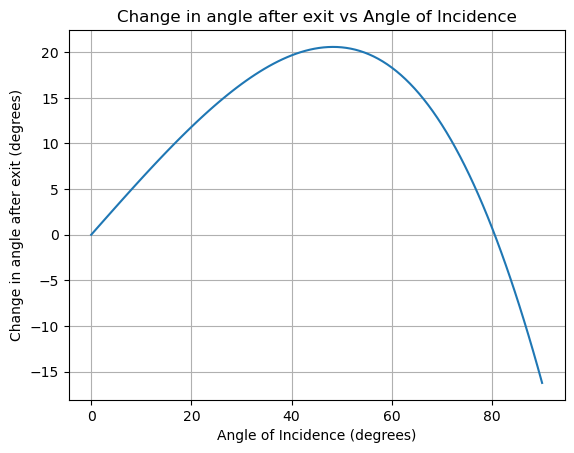

In [7]:


# Define a function to calculate angle x based on angle of incidence i
def calculate_x(i):
    r = np.arcsin(np.sin(i) / slider_refractive_index.value)
    x = np.degrees(4*r - 2*i)
    return x

# Generate values for i
i_values = np.linspace(0, np.pi/2, 100) 

# Calculate corresponding values for  x
x_values = [calculate_x(i) for i in i_values]

# Plot the graph
plt.plot(np.degrees(i_values), x_values)
plt.xlabel('Angle of Incidence (degrees)')
plt.ylabel('Change in angle after exit (degrees)')
plt.title('Change in angle after exit vs Angle of Incidence')
plt.grid(True)
plt.show()


In [9]:
# Define the slider
incidence_slider = widgets.FloatSlider(
    value=0,  
    min=0,  
    max=90, 
    step=1,
    description='Angle of incidence:',
    continuous_update=False 
)

# Display the slider
display(incidence_slider)

FloatSlider(value=0.0, continuous_update=False, description='Angle of incidence:', max=90.0, step=1.0)

In [11]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

def snells_law(n1, n2, theta1):
    return np.arcsin((n1 / n2) * np.sin(theta1))

def calculate_refraction_angle(n_air, n_water, angle_of_incidence):
    theta1 = np.radians(angle_of_incidence)
    theta2 = snells_law(n_air, n_water, theta1)
    return np.degrees(theta2)



# Example usage
n_air = 1.0  
n = slider_refractive_index.value  # Refractive index in user's liquid
angle_of_incidence = incidence_slider.value 

angle_of_refraction_deg = calculate_refraction_angle(n_air, n, angle_of_incidence)

result = 4 * angle_of_refraction_deg - 2 * angle_of_incidence
print(f"r = {angle_of_refraction_deg}")
print("x:", result)


r = 18.52386456282075
x: 16.095458251283006


In [12]:
# HTML on raindrop refraction
html_text = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Refraction inside a raindrop</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            margin: 0;
            padding: 0;
            background-color: #f9f9f9;
            color: #333;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
        }

        h1, h2, h3 {
            color: #444;
        }

        p {
            margin-bottom: 20px;
        }

        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 8px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }
    </style>
</head>
<body>

    <p>This fact shows that our angle $x$ has a maximum value plays a key role in the formation of the rainbow. Given all this information, why does the light split? The answer to this can be found if we consider the varying values for the angle found in red and blue light (which the reader might recall to be the first and last colours of the spectrum - the values for all other colours are between these two) </p>
    <table>
        <thead>
            <tr>
                <th>n</th>
                <th>i</th>
                <th>r</th>
                <th>x max</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="color: red;">1.331</td>
                <td style="color: red;">59.5</td>
                <td style="color: red;">40.3</td>
                <td style="color: red;">42.3</td>
            </tr>
            <tr>
                <td style="color: blue;">1.343</td>
                <td style="color: blue;">58.8</td>
                <td style="color: blue;">39.6</td>
                <td style="color: blue;">40.7</td>
            </tr>
        </tbody>
    </table>

<p>Because the refractive index for red light is greater than the refractive index for blue light, our maximum value for $x$ for the different colours also differ. This is the reason for light splitting in a prism (the same principle applies for a sphere), which was the way Newton split light as described earlier, as the refractive index of the material grows, the differences in refractive indexes of the different colours of light become more and more apparent, causing the light to split into its spectrum. Having $x$ maximum at 42.3 degrees for red light (which we will approximate as 42 degrees) and 39.6 degrees for blue light  means that red light can emerge at any angle less than 42 degrees, and blue light can emerge at any angle less than 40 degrees. Perhaps now the reason for the 42 degree value for x in the diagram below will become apparent - it is the greatest angle that light can enter at to form a rainbow. In order to illustrate that this is the case, I calculate $x$ maximum for your specific refractive index and draw a graph of how $x$ maximum changes as refractive index changes, resulting in a neat, downward curve.
</html>
"""

HTML(html_text)


n,i,r,x max
1.331,59.5,40.3,42.3
1.343,58.8,39.6,40.7


In [13]:
# Function to calculate x maximum

def calculate_x():
    max_x = float('-inf')
    max_r = None
    for angle in np.deg2rad(np.arange(0, 91, 1)):
        r = np.arcsin(np.sin(angle) / slider_refractive_index.value)
        x = np.degrees(4 * r - 2 * angle)
        if x > max_x:
            max_x = x
            max_r = r
    return max_x, max_r

max_x, max_r = calculate_x()
print(f"Maximum x value for white light in refractive index {slider_refractive_index.value}:", max_x)


Maximum x value for white light in refractive index 1.5260000000000002: 20.571407840093325


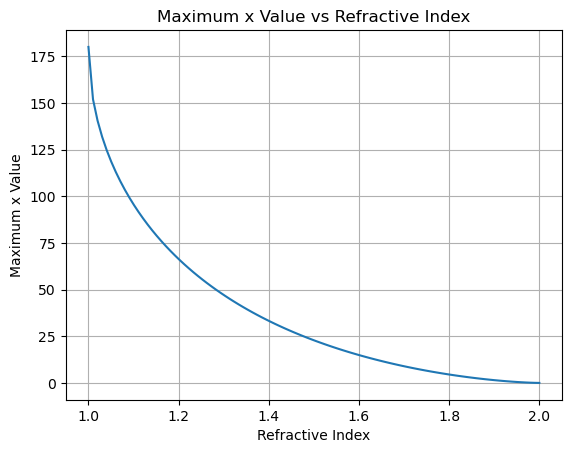

In [14]:
def calculate_x(i, refractive_index):
    max_x = float('-inf')
    for angle in np.deg2rad(np.arange(0, 91, 1)):  # Iterate over angles from 0 to 90 degrees
        r = np.arcsin(np.sin(angle) / refractive_index)
        x = np.degrees(4 * r - 2 * angle)
        if x > max_x:
            max_x = x
    return max_x

refractive_indices = np.linspace(1, 2, 100)  # Generate 100 values from 1 to 2
max_x_values = []

for n in refractive_indices:
    max_x = calculate_x(np.deg2rad(45), n)  
    max_x_values.append(max_x)

plt.plot(refractive_indices, max_x_values)
plt.xlabel('Refractive Index')
plt.ylabel('Maximum x Value')
plt.title('Maximum x Value vs Refractive Index')
plt.grid(True)
plt.show()


In [15]:

html_text = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Refraction inside a raindrop</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            margin: 0;
            padding: 0;
            background-color: #f9f9f9;
            color: #333;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
        }

        h1, h2, h3 {
            color: #444;
        }

        p {
            margin-bottom: 20px;
        }

        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 8px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }
    </style>
</head>
<body>

<p>Therefore, if we take a droplet of water, with light entering it, the light will split, as the different refractive indexes become extenuated. When the light exits the raindrop, a cone will be formed, of the set of red light rays with a maximum angle of 42 degrees, through all the colours of the spectrum of the light, all the way up to blue light, where the maximum is 40.7 degrees. The reason that the resulting shape is a cone is because of the spherical geometry of the raindrop - there is a circular set of possible points where the ray of light can land at 42 degrees. From this, therefore, it follows that, there will be one area where only red will be visible, and as red has the greatest angle $x$ maximum, this will be on the outside, then a region with orange, then yellow and so on. There remains, however, a fundamental issue - how can it be that we don't just see red? The point where there is red is the only angle where only red is present, why then, as more colours are added to the spectrum, and mix with eachother, do the colours of the rainbow not converge towards white as they mix?
<p>The answer to this lies in the properties of the relative intensities of each colour with respect to angle $x$. The intensity of each colour lies low at a constant positive value, until it comes close to its maximum angle, then peaks and then goes down to zero, which is the only reason the colourful rainbow we see is not all white.
</html>
</html>
"""

HTML(html_text)


In [16]:
html_text = """
<body>

 
<p>It should become clear form this that many properties of the rainbow depend on the properties of rain. For example, larger raindrops produce more intense colors and wider rainbows, because larger raindrops have a greater capacity to refract and reflect light, resulting in a more pronounced separation of colors and a broader rainbow arc.In order to properly simulate a full rainbow, we need more details on the rain. Furthermore, arger and denser raindrops scatter and refract light more effectively, leading to a brighter rainbow. The increased scattering and refraction enhance the visibility of the rainbow against the background sky. The following sliders will ask for the median diameter of the raindrops, and the density of the raindrops. We use the Marshall-Palmer distribution, an interesting model which creates a random distribution of the sizes (as raindrops aren't all the same size) and positions of raindrops.
</html>
"""

HTML(html_text)


In [17]:


# Create the slider widget for selecting raindrop radius
slider_radius = widgets.FloatSlider(
    value=1.6,
    min=0.1,
    max=2.5,
    step=0.01,
    description='Median Raindrop Radius:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)

# Create an output widget to display results
output_radius = widgets.Output()

# Function to update the raindrop diagram
def update_raindrop_diagram(radius):
    with output_radius:
        clear_output(wait=True)
        fig, ax = plt.subplots()
        circle = plt.Circle((3.5, 3.5), radius, color='blue', alpha=0.75)
        ax.add_artist(circle)
        ax.set_aspect('equal', 'box')
        ax.set_xlim(0, 7)
        ax.set_ylim(0, 7)
        ax.set_title('Diagram of medium circular raindrop')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.show()

# Function to handle slider value change event
def on_slider_radius_change(change):
    with output_radius:
        clear_output(wait=True)
        print("Median Raindrop Radius (mm): {:.1f}".format(change['new']))
        # Update the raindrop diagram
        update_raindrop_diagram(change['new'])

# Attach the event handler to the slider
slider_radius.observe(on_slider_radius_change, names='value')

# Display the widgets
display(slider_radius)
display(output_radius)

FloatSlider(value=1.6, continuous_update=False, description='Median Raindrop Radius:', max=2.5, min=0.1, step=…

Output()

In [18]:

# Define the slider
density_slider = widgets.FloatSlider(
    value=100,  
    min=10,     
    max=500,  
    step=10,  
    description='Rain density (drops/m^2):'
)

# Display the slider
display(density_slider)

FloatSlider(value=100.0, description='Rain density (drops/m^2):', max=500.0, min=10.0, step=10.0)

In [19]:
# The function which will be used later in my code for the 3 dimensional raindrop distribution
def generate_raindrop_distribution(density, volume_size, median_diameter):
    # Calculate the number of raindrops based on density and volume size
    num_raindrops = int(density * np.prod(volume_size))
    
    # Generate random coordinates for raindrops within the specified volume
    raindrop_coords = np.random.uniform(size=(num_raindrops, 3)) * volume_size
    
    # Calculate the scale factor based on median diameter
    scale_factor = 1.0 / (median_diameter * 0.057)
    
    # Calculate raindrop sizes using Marshall-Palmer distribution
    diameters = np.random.exponential(scale=median_diameter / scale_factor, size=num_raindrops)
    
    return raindrop_coords, diameters

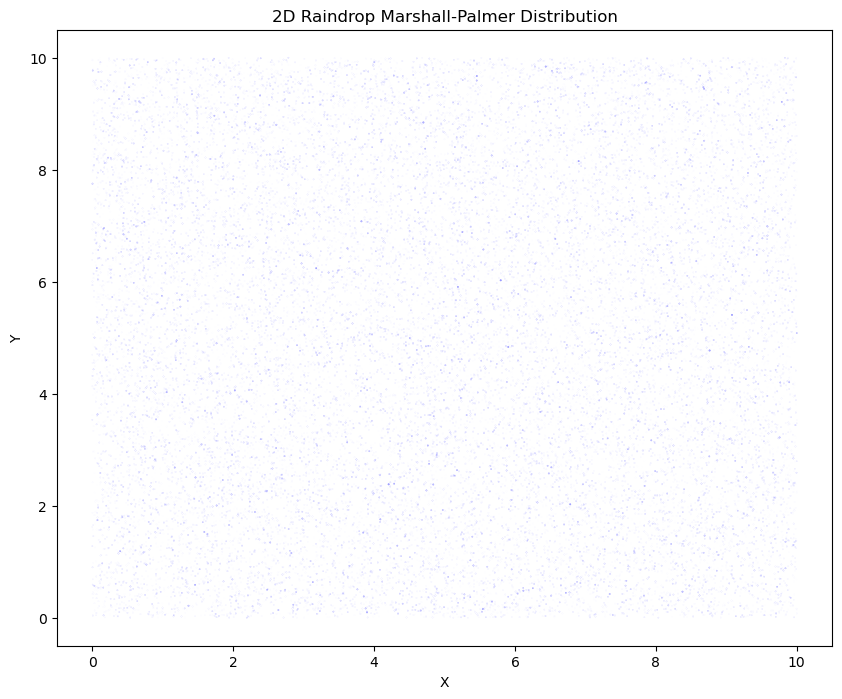

In [20]:

# Simplified function to generate 2 dimensional raindrop distribution for demonstrational purposes
def generate_raindrop_distribution2d(density, area_size, median_diameter):
    # Calculate the maximum number of raindrops based on density and area size
    max_num_raindrops = int(density * np.prod(area_size))
    
    # Generate random coordinates for raindrops within the specified area
    raindrop_coords = np.random.uniform(size=(max_num_raindrops, 2)) * area_size
    
    # Calculate the scale factor based on median diameter
    scale_factor = 1.0 / (median_diameter * 0.057)
    
    # Calculate raindrop sizes using Marshall-Palmer distribution
    diameters = np.random.exponential(scale=median_diameter / scale_factor, size=max_num_raindrops)
    
    # Filter raindrops based on density
    num_raindrops = min(len(raindrop_coords), max_num_raindrops)
    raindrop_coords = raindrop_coords[:num_raindrops]
    diameters = diameters[:num_raindrops]
    
    return raindrop_coords, diameters

# Function to create 2D scatter plot of raindrops
def plot_raindrops(median_diameter, density, area_size):
    # Generate raindrop distribution
    raindrop_coords, diameters = generate_raindrop_distribution2d(density, area_size, median_diameter)
    
    # Create scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(raindrop_coords[:, 0], raindrop_coords[:, 1], s=np.pi * (median_diameter * diameters)**2, c='blue', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Raindrop Marshall-Palmer Distribution')
    
    # Show plot
    plt.show()

# Set parameters
median_diameter = 2 * slider_radius.value
rain_density = density_slider.value
area_size = (10, 10)

# Plot raindrops
plot_raindrops(median_diameter, rain_density, area_size)


In [21]:
html_text = """
<body>

 
<p>We have, so far, in our exploration of the rainbow, only considered white light and its refraction into different colours. However, different colours of light have different spectra. For example, when a rainbow occurs at sunset, where the colours of the spectrum are in a reddish shade, the rainbow produced will look red (see picture below). This dependence of the colours should make sense - what a rainbow is doing is splitting a given colour into its visibe spectrum, if the only spectrum available is red, the rainbow will be red.
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e1/Rainbow_Sunset.jpg" alt="A red sunset rainbow" style="width: 400px;" >
<p>You can interact with the colours and the resulting colour spectrum below:
"""
HTML(html_text)


In [22]:

def get_combined_color_patch(violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity):
    # Convert intensity values to RGB values
    violet = (int(violet_intensity * 255), 0, int(violet_intensity * 255))
    blue = (0, 0, int(blue_intensity * 255))
    cyan = (0, int(cyan_intensity * 255), int(cyan_intensity * 255))
    green = (0, int(green_intensity * 255), 0)
    yellow = (int(yellow_intensity * 255), int(yellow_intensity * 255), 0)
    orange = (int(orange_intensity * 255), int(orange_intensity * 255/2), 0)
    red = (int(red_intensity * 255), 0, 0)
    
    # Calculate combined RGB values
    combined_color = (
        min(255, violet[0] + blue[0] + cyan[0] + green[0] + yellow[0] + orange[0] + red[0]),
        min(255, violet[1] + blue[1] + cyan[1] + green[1] + yellow[1] + orange[1] + red[1]),
        min(255, violet[2] + blue[2] + cyan[2] + green[2] + yellow[2] + orange[2] + red[2])
    )
    
    # Print the RGB values
    print(f"RGB: {combined_color}")
    
    # Create a color patch using HTML for combined color with a black border
    combined_color_patch_html = f'<div style="width:200px; height:200px; background-color:rgb{combined_color}; border: 2px solid black;"></div>'

    # Display the combined color patch
    display(widgets.HTML(value=combined_color_patch_html))

# Create sliders for intensity of each color component
slider_violet = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Violet:')
slider_blue = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Blue:')
slider_cyan = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Cyan:')
slider_green = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Green:')
slider_yellow = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Yellow:')
slider_orange = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Orange:')
slider_red = widgets.FloatSlider(value=0.0, min=0.0, max=1.0, step=0.01, description='Red:')

# Update function when the sliders change
display(widgets.interactive(get_combined_color_patch, violet_intensity=slider_violet, blue_intensity=slider_blue, cyan_intensity=slider_cyan,
                    green_intensity=slider_green, yellow_intensity=slider_yellow, orange_intensity=slider_orange, red_intensity=slider_red))




interactive(children=(FloatSlider(value=0.0, description='Violet:', max=1.0, step=0.01), FloatSlider(value=0.0…

In [27]:
# Define a function to update the spectrum plot
def update_spectrum_plot(violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity):
    wavelengths = [400, 450, 500, 550, 600, 650, 700]
    intensities = [violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity]

    plt.figure(figsize=(8, 4))
    plt.plot(wavelengths, intensities, marker='o', color='b')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.title('Light Spectrum')
    plt.grid(True)
    plt.show()

# Use interact to automatically update the plot when sliders are adjusted
widgets.interact(update_spectrum_plot,
         violet_intensity=slider_violet,
         blue_intensity=slider_blue,
         cyan_intensity=slider_cyan,
         green_intensity=slider_green,
         yellow_intensity=slider_yellow,
         orange_intensity=slider_orange,
         red_intensity=slider_red)


interactive(children=(FloatSlider(value=1.0, description='Violet:', max=1.0, step=0.01), FloatSlider(value=1.0…

<function __main__.update_spectrum_plot(violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity)>

In [28]:
def draw_light_wideness(angle):
    plt.clf() 
    plt.figure(figsize=(6, 6))
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    
    # Convert angle to radians
    angle_rad = np.deg2rad(angle)
    
    # Plot two lines separated by the angle
    line1 = np.array([[0, 0], [np.cos(angle_rad/2), np.sin(angle_rad/2)]])
    line2 = np.array([[0, 0], [np.cos(-angle_rad/2), np.sin(-angle_rad/2)]])
    
    plt.plot(line1[:, 0], line1[:, 1], color='blue')  # Plot line 1
    plt.plot(line2[:, 0], line2[:, 1], color='red')   # Plot line 2
    
    # Plot a dot at the center point
    plt.plot(0, 0, 'ko')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Diagram of Light Wideness')
    plt.axis('equal')
    plt.axis('off')  # Turn off the axes
    plt.show()

# Create a slider widget
angle_slider = FloatSlider(value=90, min=0, max=180, step=1, description='Angle')

# Make the plot interactive
interactive_plot = interactive(draw_light_wideness, angle=angle_slider)
interactive_plot


NameError: name 'FloatSlider' is not defined

In [23]:
def generate_light_rays(num_rays, cone_angle):
    cone_angle_rad = np.deg2rad(cone_angle)  # Convert cone angle to radians
    phi = np.random.uniform(0, 2*np.pi, size=num_rays)
    cos_theta = np.random.uniform(np.cos(cone_angle_rad), 1, size=num_rays)
    sin_theta = np.sqrt(1 - cos_theta**2)
    x = sin_theta * np.cos(phi)
    y = sin_theta * np.sin(phi)
    z = cos_theta
    return np.column_stack((x, y, z))


In [24]:
html_text = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Refraction inside a raindrop</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            margin: 0;
            padding: 0;
            background-color: #f9f9f9;
            color: #333;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
        }

        h1, h2, h3 {
            color: #444;
        }

        p {
            margin-bottom: 20px;
        }

        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 8px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }
    </style>
</head>
<body>

 
<p>Using this data, we can plot the rainbow wavelength intensity distribution, which provides insight into the colors and their respective intensities that would appear in a given rainbow. By simulating the interaction between sunlight and raindrops, the function computes the intensity of light across various wavelengths, representing different colors, within the resulting rainbow. This distribution offers a visualization of the relative brightness of each color present in the rainbow, elucidating how factors such as raindrop size and distribution impact its appearance. It allows us to anticipate the specific colors observable in a real-world rainbow under similar environmental conditions.
"""
HTML(html_text)


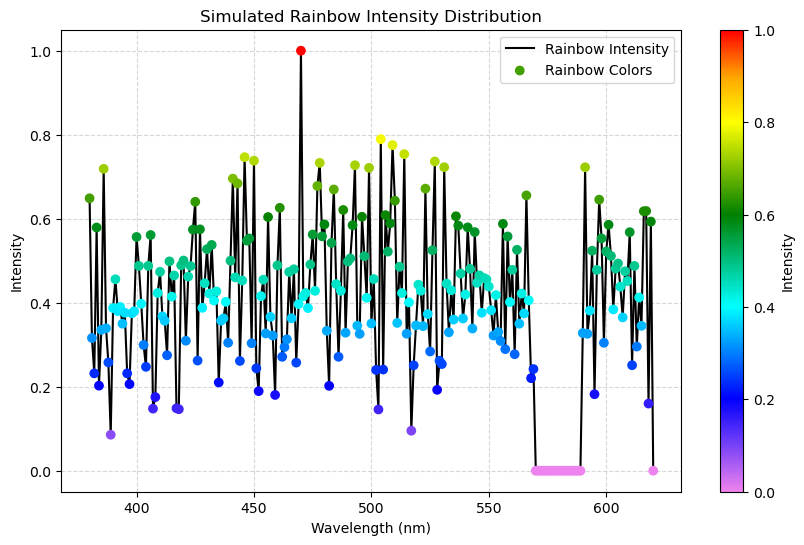

In [25]:
# Function to simulate the primary rainbow
def simulate_rainbow(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity):
    wavelengths = np.linspace(380, 620, 241)
    rainbow_intensity = np.zeros_like(wavelengths)
    # Simulate refraction, reflection, and dispersion
    for wavelength_index, wavelength in enumerate(wavelengths):
        for i in range(num_rays):
            ray_direction = np.random.uniform(-1, 1, size=3)
            ray_direction /= np.linalg.norm(ray_direction) 

            # Importance sampling based on angle with zenith
            zenith_angle = np.arccos(ray_direction[2])  
            weight = np.sin(zenith_angle)

            # Randomly select a raindrop
            raindrop_index = np.random.choice(len(raindrop_coords))

            # Get raindrop position and size
            raindrop_position = np.append(raindrop_coords[raindrop_index], 0)  # Adding z-coordinate (0) for 3D intersection
            raindrop_radius = raindrop_sizes[raindrop_index]

            distance_to_intersection = np.dot(raindrop_position[:3], ray_direction)
            
            if distance_to_intersection <= raindrop_radius:
                cos_incidence_angle = distance_to_intersection / raindrop_radius
                cos_incidence_angle = np.clip(cos_incidence_angle, -1, 1)
                incidence_angle = np.arccos(cos_incidence_angle)

                # Simulate refraction (Snell's law)
                refraction_angle = np.arcsin(np.sin(incidence_angle) / refractive_index)
                deviation_angle = np.arcsin(np.sin(incidence_angle) - np.sin(refraction_angle))
                dispersion_angle = deviation_angle  
                
                # Calculate intensity based on dispersion angle and importance weight
                intensity = (violet_intensity if wavelength < 450 else
                             blue_intensity if wavelength < 485 else
                             cyan_intensity if wavelength < 500 else
                             green_intensity if wavelength < 570 else
                             yellow_intensity if wavelength < 590 else
                             orange_intensity if wavelength < 620 else
                             red_intensity) * dispersion_angle * weight
                rainbow_intensity[wavelength_index] += intensity
    max_intensity = np.max(rainbow_intensity)
    if max_intensity == 0:
        return wavelengths, rainbow_intensity
    rainbow_intensity /= max_intensity
    
    return wavelengths, rainbow_intensity


def update_spectrum_plot(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity):
    wavelengths, rainbow_intensity = simulate_rainbow(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity)

    # Check if rainbow_intensity is all zeros (colour is black)
    if np.max(rainbow_intensity) == 0:
        print("No rainbow intensity data to plot. Change the colour.")
        return

    # Create a colormap visualization for rainbow colors
    colors = [(0, 'violet'), (0.2, 'blue'), (0.4, 'cyan'), (0.6, 'green'), (0.8, 'yellow'), (0.9, 'orange'), (1, 'red')]
    cmap = LinearSegmentedColormap.from_list('rainbow', colors)

    # Plot the rainbow intensity curve
    plt.figure(figsize=(10, 6))
    plt.plot(wavelengths, rainbow_intensity, color='black', label='Rainbow Intensity')
    colors = rainbow_intensity / np.max(rainbow_intensity)  
    plt.scatter(wavelengths, rainbow_intensity, c=colors, cmap=cmap, label='Rainbow Colors', zorder=10)

    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array(rainbow_intensity)
    cbar = plt.colorbar(sm, ax=plt.gca()) 
    cbar.set_label('Intensity')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.title('Simulated Rainbow Intensity Distribution')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.show()

# Simulation parameters
num_rays = 1000 
area_size = 100  
density = density_slider.value
median_diameter = 2 * slider_radius.value
refractive_index = slider_refractive_index.value
violet_intensity = slider_violet.value
blue_intensity = slider_blue.value
cyan_intensity = slider_cyan.value
green_intensity = slider_green.value
yellow_intensity = slider_yellow.value
orange_intensity = slider_orange.value
red_intensity = slider_red.value
raindrop_coords, raindrop_sizes = generate_raindrop_distribution(density, area_size, median_diameter)

# Call the function to update the spectrum plot
update_spectrum_plot(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity)

In [26]:
html_text = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Refraction inside a raindrop</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            line-height: 1.6;
            margin: 0;
            padding: 0;
            background-color: #f9f9f9;
            color: #333;
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
        }

        h1, h2, h3 {
            color: #444;
        }

        p {
            margin-bottom: 20px;
        }

        table {
            width: 100%;
            border-collapse: collapse;
        }
        th, td {
            padding: 8px;
            text-align: left;
            border-bottom: 1px solid #ddd;
        }
    </style>
</head>
<body>

 
<p>Now we have explored the colour scheme and intensities of the raibow, we can consider the geometry of our raibow. Recall from earlier that the raindrops produce a cone of colourful light - the top half of this cone is what we see as the rainbow. However, what precisely is the shape of the resulting rainbow? Because of the cone produced by the raindrop, the rainbow will be somewhat circular, however, the difference between different rainbows is the percentage radius above the ground. For instance, if you compare these two images
<p>
<img src="https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjl0z-JT4NMlKtSoNO_FLxwzOs3xuxm-Yb-NIozWn8E3AOq8OK-gCIpSGzeI5sA6Nvvq-cFYjJSlVVulkoDiiwHiYTsP2eykgYOQA3ZF8EzyZ-oUsl4aVjxA4ecmwqphRCDMvgij6yHACo/s1600/Rainbow**.jpg" alt="A photo of a rainbow" style="width: 400px;">

<img src="https://shallowsky.com/images/hummer-rainbow/img_0470-1024.jpg" alt="A photo of a rainbow" style="width: 400px;">

<p>Notice that, in the first rainbow, only a very small part of its radius is above ground, whereas with the second rainbow its entire radius is above ground. What is it that determines how tall a rainbow is? It mostly depends on the angle the sun enters the raindrops (the angle of the sun also makes a large difference on which raindrops will be intercepted) and how far away the observer is. The relationship between these factors is very interesting, and I simulate them below:

"""
HTML(html_text)


In [27]:
from ipywidgets import widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

# Create the first vertical angle slider
print("Enter the vertical angle of the light source (where 0˚ is at the bottom left and 180˚ is at the bottom right): ")
vertical_angle_slider1 = widgets.FloatSlider(value=0.0, min=0.0, max=90.0, step=1.0, description='Light Source Angle (degrees):')
output1 = widgets.Output()

# Define the update function for the first slider
def update_sun_angle1(change):
    with output1:
        clear_output(wait=True)
        sun_angle = vertical_angle_slider1.value  
        plt.figure(figsize=(6,6))
        ax = plt.gca()
        ax.set_aspect('equal')
        theta = np.linspace(0, np.pi, 100)
        x = np.cos(theta)
        y = np.sin(theta)
        plt.plot(-x, y, 'w-')  
        plt.plot(0, 0, 'ko')  
        plt.text(0, 0, ' Observer', verticalalignment='bottom', horizontalalignment='left')  
        angle_rad = np.deg2rad(sun_angle)
        x_sun = np.cos(angle_rad)
        y_sun = np.sin(angle_rad)
        plt.plot(-x_sun, y_sun, 'ro')  
        ax.set_xlim(-1.1, 0.1)
        ax.set_ylim(-0.1, 1.1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()
        vertical_angle_slider2.value = vertical_angle_slider1.value  # Update the value of the second slider

vertical_angle_slider1.observe(update_sun_angle1, 'value')

# Display the first slider
display(vertical_angle_slider1, output1)


Enter the vertical angle of the light source (where 0˚ is at the bottom left and 180˚ is at the bottom right): 


FloatSlider(value=0.0, description='Light Source Angle (degrees):', max=90.0, step=1.0)

Output()

In [28]:
# Define the sliders
height_slider = widgets.FloatSlider(
    value=1.5, 
    min=0.1,  
    max=5, 
    step=0.1,  
    description='Height (m):',
    continuous_update=False 
)

distance_slider = widgets.FloatSlider(
    value=10.0, 
    min=1.0,    
    max=100.0,  
    step=1.0,  
    description='Distance (m):',
    continuous_update=False  
)

# Display the sliders
display(height_slider)
display(distance_slider)

FloatSlider(value=1.5, continuous_update=False, description='Height (m):', max=5.0, min=0.1)

FloatSlider(value=10.0, continuous_update=False, description='Distance (m):', min=1.0, step=1.0)

Percentage of rainbow radius above ground: 83.06559161395977 %


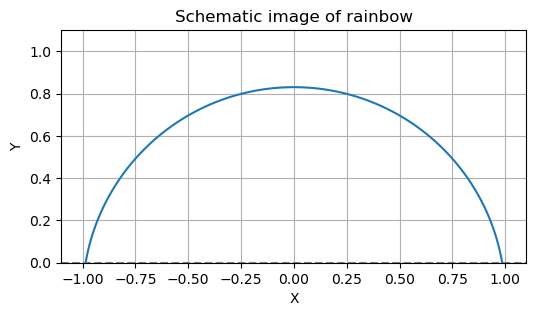

In [107]:
import numpy as np

def calculate_rainbow_properties(vertical_angle,  observer_height, observer_distance):
    droplet_radius = slider_radius.value 
    air_index = 1 
    refractive = slider_refractive_index.value
    vertical_angle_rad = np.radians(vertical_angle)

    # Calculate the critical angle for total internal reflection
    critical_angle = np.arcsin(air_index / refractive_index)
    incidence_angle = np.arcsin(np.sin(vertical_angle_rad) / refractive_index)
    if incidence_angle > critical_angle:
        incidence_angle = critical_angle  

    # Calculate the angle of refraction using Snell's law
    refraction_angle = np.arcsin((air_index / refractive_index) * np.sin(incidence_angle))
    deviation_angle = np.pi - incidence_angle - refraction_angle
    rainbow_radius = droplet_radius * np.sin(deviation_angle / 2)
    angle_subtended = 2 * np.arcsin(droplet_radius / (2 * rainbow_radius))
    ratio = 2 * rainbow_radius / np.tan(angle_subtended / 2)

    # Calculate the distance from the observer to the point where the rainbow intersects the ground
    intersection_distance = observer_height / np.tan(vertical_angle_rad)

    # Calculate the percentage of the radius that is above ground
    above_ground_percentage = (observer_distance - intersection_distance) / observer_distance

    return above_ground_percentage * 100

def plot_semicircle(percentage_above_ground):
    # Define the radius of the semicircle
    radius = 1.0

    percentage_above_ground = 1 - percentage_above_ground / 100
    # Calculate the height of the semicircle
    height = radius * percentage_above_ground
    
    # Create an array of angles from 0 to pi (180 degrees)
    angles = np.linspace(0, np.pi, 100)
    
    # Calculate the x and y coordinates of the semicircle
    x = radius * np.cos(angles)
    y = radius * np.sin(angles) - height
    
    # Plot the semicircle
    plt.figure(figsize=(6, 4))
    plt.plot(x, y)
    
    # Plot a horizontal line representing the ground
    plt.axhline(0, color='gray', linestyle='--')
    
    # Set axis limits and labels
    plt.xlim(-1.1, 1.1)
    plt.ylim(0, 1.1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Schematic image of rainbow')
    
    # Show plot
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


vertical_angle = vertical_angle_slider1.value
observer_height = height_slider.value
observer_distance = distance_slider.value
percentage_above_ground = calculate_rainbow_properties(vertical_angle, observer_height, observer_distance)
print("Percentage of rainbow radius above ground:", percentage_above_ground, "%")
plot_semicircle(percentage_above_ground)

In [108]:
html_text = """
 
<p>This shows us something very interesting about the rainbow - it is unique to the observer. If the observer moves forward, the resulting geometry of the rainbow will change, if they move backward it will change again. The schematic above is the picture of the rainbow the observer will see - nobody else, unless they stand in precisely the same position as the observer, will see the same rainbow with the same radius.
<p>We can take this one step further and ask the question - what must happen in order for the observer to actually see a rainbow? Consider again the 42 degree cone of red light formed by the rainbow. One idea that we missed is that outside of this cone there is no light (which has passed throught the raindrop). This makes sense - the furthest angle that any part of light can disperse is the 42 degree angle followed by the red light - therefore, if we imagined that all of the light in a system is concentrated into one light ray, and this one light ray passed through the raindrop, you would only be able to see the cone - there would be no light anywhere els. Obviously, in the case of the rainbow, where there are a large amount of light rays and raindrops, there will still be light outside of the cone, but this principle creates what is known as Alexander's dark band, which we will explore later.
<p>However, when we explore whether or not you will be able to see a rainbow, this has fundamental importance - if you look upwards at an angle of 50 degrees from the light rays, which are all paralell, (note that all of this is relative to the light rays), you will not see a rainbow, no matter which raindrop you look at, because you will be out of the raindrop's 42 degree angle light cone.
<p>From this follows a fundamental law regarding whether or not an observer will be able to see a rainbow - the angle the observer is looking up off the light ray is the same as $x$ maximum (calculated earlier) of a specific colour which is visible in the rainbow, that is the colour they will see, provided that the light is behind the observer, and there are raindrops in front of the observer. I simulate this below - given the sun angle you entered earlier (I will repeat the slider here) and your vertical viewing angle, we will calculate whether or not you will see a rainbow, and, if your vision were reduced to a single line, which colour you would be looking directly at. (unfortunately, due to a lack of data, the liquid used must be water).
"""
HTML(html_text)


In [56]:
def update_plot(angle):
    plt.clf()  # Clear the current figure to update the plot
    angle_radians = np.radians(angle)
    plt.quiver(0, 0, np.cos(angle_radians), np.sin(angle_radians), scale=3, color='black')  # Plot arrow representing viewing angle
    plt.text(0, 0, "You", horizontalalignment='center', verticalalignment='center')  # Label the observer's viewpoint
    plt.axis('equal')  # Ensure aspect ratio is equal
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5) 
    plt.axis('off')
    plt.show()

# Create the slider widget for selecting the viewing angle of the observer
slider_vert_angle = widgets.FloatSlider(
    value=0,
    min=0,
    max=90,
    step=0.1,
    description='Vertical Viewing Angle:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

# Create an output widget to display the plot
output_plot = widgets.Output()

# Function to handle slider value change event
def on_slider_vert_angle_change(change):
    with output_plot:
        clear_output(wait=True)
        update_plot(change.new)

# Attach the event handler to the slider
slider_vert_angle.observe(on_slider_vert_angle_change, names='value')

# Display the widgets
display(slider_vert_angle)
display(output_plot)



FloatSlider(value=0.0, continuous_update=False, description='Vertical Viewing Angle:', max=90.0, readout_forma…

Output()

In [37]:
from ipywidgets import widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output

# Create the second vertical angle slider
vertical_angle_slider2 = widgets.FloatSlider(value=0.0, min=0.0, max=90.0, step=1.0, description='Light Source Angle (degrees):')
output2 = widgets.Output()

def update_sun_angle2(change):
    with output2:
        clear_output(wait=True)
        sun_angle = vertical_angle_slider2.value  
        plt.figure(figsize=(6,6))
        ax = plt.gca()
        ax.set_aspect('equal')
        theta = np.linspace(0, np.pi, 100)
        x = np.cos(theta)
        y = np.sin(theta)
        plt.plot(-x, y, 'w-')  
        plt.plot(0, 0, 'ko')  
        plt.text(0, 0, ' Observer', verticalalignment='bottom', horizontalalignment='left')  
        angle_rad = np.deg2rad(sun_angle)
        x_sun = np.cos(angle_rad)
        y_sun = np.sin(angle_rad)
        plt.plot(-x_sun, y_sun, 'ro')  
        ax.set_xlim(-1.1, 0.1)
        ax.set_ylim(-0.1, 1.1)
        ax.set_xticks([])
        ax.set_yticks([])
        plt.show()
        vertical_angle_slider1.value = vertical_angle_slider2.value  # Update the value of the first slider

# Attach the update function to the slider
vertical_angle_slider2.observe(update_sun_angle2, 'value')
display(vertical_angle_slider2, output2)


FloatSlider(value=0.0, description='Light Source Angle (degrees):', max=90.0, step=1.0)

Output()

In [109]:
observer_by_rays = vertical_angle_slider1.value + slider_vert_angle.value
# Function to tell if observer will see rainbow
def see_rainbow(observer_by_rays):
    if 39.6 <= observer_by_rays <= 42.3:
        print("You will see the primary rainbow.")
    elif 49.6 <= observer_by_rays <= 52.3:
        print("You will see the secondary rainbow.")
    elif 42.3 <= observer_by_rays <= 49.6:
        print("You are looking into Alexander's band.")
    elif observer_by_rays <= 39.6:
        print("You will not see a rainbow. You are looking at the bright region insider the rainbow.")
    else:
        print("You will not see a rainbow. You are lookng above it.")

see_rainbow(observer_by_rays)


You will see the primary rainbow.


In [110]:
html_text = """
<p>We have, so far, only considered rainbows which are formed by a pattern of refraction, reflection and refraction again. Now consider what would happen if the additional internal reflection, whereby (following Snell's law), some of the light refracted out of the raindrop and some of it reflected internally. If we now again make the calculations with Snell's law (which I won't bore you with) we would find that there is no maximum value for the various colours - there is a minimum value. This calculation yields that the secondary rainbow which is formed by this is 10 degrees greater than the primary rainbow - that is, you would need to look at 52 degrees to see the bottom colour, and the colours are reversed. Furthermore, as there are two reflections and a lot of the light has escaped, it is much fainter than the first.  
<p>
<img src="https://methodshop.com/wp-content/uploads/double-rainbow-1600x900.jpg" alt="A photo of a rainbow" style="width: 400px;">

<p>The secondary bow is almost always presenent. If you have ever seen just a primary bow, it is because the secondary bow is so faint that you have missed it. Below, I run a simulation of the secondary rainbow and plot its intensity curve alongside that of the primary rainbow.
 """
HTML(html_text)


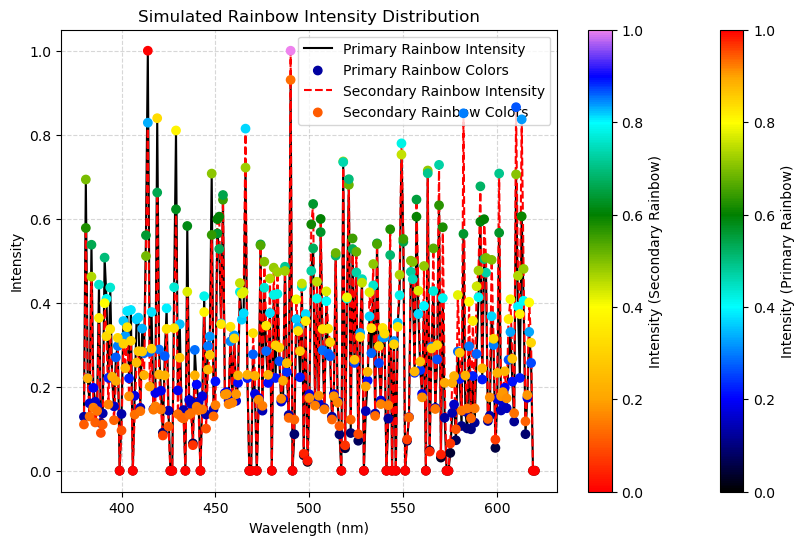

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def simulate_rainbows(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity):
    # Define parameters
    wavelengths = np.linspace(380, 620, 241)  # Wavelengths from 380 nm to 620 nm

    # Initialize rainbow intensities
    primary_intensity = np.zeros_like(wavelengths)
    secondary_intensity = np.zeros_like(wavelengths)

    # Simulate refraction, reflection, and dispersion
    for wavelength_index, wavelength in enumerate(wavelengths):
        for i in range(num_rays):
            ray_direction = np.random.uniform(-1, 1, size=3)
            ray_direction /= np.linalg.norm(ray_direction) 

            # Importance sampling based on angle with zenith
            zenith_angle = np.arccos(ray_direction[2])  
            weight = np.sin(zenith_angle) 

            # Randomly select a raindrop
            raindrop_index = np.random.choice(len(raindrop_coords))
            raindrop_position = np.append(raindrop_coords[raindrop_index], 0)
            raindrop_radius = raindrop_sizes[raindrop_index]
            distance_to_intersection = np.dot(raindrop_position[:3], ray_direction)

            # Check if ray intersects with raindrop
            if distance_to_intersection <= raindrop_radius:
                cos_incidence_angle = distance_to_intersection / raindrop_radius
                cos_incidence_angle = np.clip(cos_incidence_angle, -1, 1)
                incidence_angle = np.arccos(cos_incidence_angle)

                # Simulate refraction (Snell's law)
                refraction_angle = np.arcsin(np.sin(incidence_angle) / refractive_index)
                deviation_angle = np.arcsin(np.sin(incidence_angle) - np.sin(refraction_angle))
                primary_dispersion_angle = deviation_angle  

                # Calculate secondary dispersion angle based on deviation angle and internal reflection
                argument = np.sin(incidence_angle) - np.sin(-refraction_angle)
                argument = np.clip(argument, -1, 1)  
                secondary_dispersion_angle = np.arcsin(argument)

                # Calculate intensity for primary rainbow
                primary_intensity[wavelength_index] += (
                    violet_intensity if wavelength < 450 else
                    blue_intensity if wavelength < 485 else
                    cyan_intensity if wavelength < 500 else
                    green_intensity if wavelength < 570 else
                    yellow_intensity if wavelength < 590 else
                    orange_intensity if wavelength < 620 else
                    red_intensity
                ) * primary_dispersion_angle * weight

                # Calculate intensity for secondary rainbow
                secondary_intensity[wavelength_index] += (
                    violet_intensity if wavelength > 450 else
                    blue_intensity if wavelength > 485 else
                    cyan_intensity if wavelength > 500 else
                    green_intensity if wavelength > 570 else
                    yellow_intensity if wavelength > 590 else
                    orange_intensity if wavelength > 620 else
                    red_intensity
                ) * secondary_dispersion_angle * weight

    # Normalize intensities
    max_primary_intensity = np.max(primary_intensity)
    max_secondary_intensity = np.max(secondary_intensity)

    if max_primary_intensity == 0 and max_secondary_intensity == 0:
        return wavelengths, primary_intensity, secondary_intensity

    primary_intensity /= max_primary_intensity
    secondary_intensity /= max_secondary_intensity
    
    return wavelengths, primary_intensity, secondary_intensity

def update_spectrum_plot(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity):
    wavelength, primary_intensity, secondary_intensity = simulate_rainbows(
        num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity)

    # Check if intensities are all zeros (colour is black)
    if np.max(primary_intensity) == 0 and np.max(secondary_intensity) == 0:
        print("No rainbow intensity data to plot. Change the colour. ")
        return

    # Create custom colormaps for primary and secondary rainbows
    primary_colors = [(0, 'black'), (0.2, 'blue'), (0.4, 'cyan'), (0.6, 'green'), (0.8, 'yellow'), (0.9, 'orange'), (1, 'red')]
    primary_cmap = LinearSegmentedColormap.from_list('primary_rainbow', primary_colors)

    secondary_colors = [(0, 'red'), (0.2, 'orange'), (0.4, 'yellow'), (0.6, 'green'), (0.8, 'cyan'), (0.9, 'blue'), (1, 'violet')]
    secondary_cmap = LinearSegmentedColormap.from_list('secondary_rainbow', secondary_colors)

    # Plot primary rainbow intensity curve
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, primary_intensity, color='black', label='Primary Rainbow Intensity')

    # Add primary rainbow colormap visualization
    primary_colors = primary_intensity / np.max(primary_intensity)  # Normalize intensities for colormap
    plt.scatter(wavelength, primary_intensity, c=primary_colors, cmap=primary_cmap, label='Primary Rainbow Colors', zorder=10)

    # Plot secondary rainbow intensity curve
    plt.plot(wavelength, secondary_intensity, color='red', linestyle='--', label='Secondary Rainbow Intensity')

    # Add secondary rainbow colormap visualization
    secondary_colors = secondary_intensity / np.max(secondary_intensity)  # Normalize intensities for colormap
    plt.scatter(wavelength, secondary_intensity, c=secondary_colors, cmap=secondary_cmap, label='Secondary Rainbow Colors', zorder=10)

    # Add colorbars
    primary_sm = plt.cm.ScalarMappable(cmap=primary_cmap)
    primary_sm.set_array(primary_intensity)
    primary_cbar = plt.colorbar(primary_sm, ax=plt.gca())  # Explicitly specify the axes object for the colorbar
    primary_cbar.set_label('Intensity (Primary Rainbow)')

    secondary_sm = plt.cm.ScalarMappable(cmap=secondary_cmap)
    secondary_sm.set_array(secondary_intensity)
    secondary_cbar = plt.colorbar(secondary_sm, ax=plt.gca())  # Explicitly specify the axes object for the colorbar
    secondary_cbar.set_label('Intensity (Secondary Rainbow)')

    # Add annotations
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.title('Simulated Rainbow Intensity Distribution')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.show()


num_rays = 1000 
area_size = 100
density = density_slider.value
median_diameter = 2 * slider_radius.value 
refractive_index = slider_refractive_index.value

violet_intensity = slider_violet.value
blue_intensity = slider_blue.value
cyan_intensity = slider_cyan.value
green_intensity = slider_green.value
yellow_intensity = slider_yellow.value
orange_intensity = slider_orange.value
red_intensity = slider_red.value
raindrop_coords, raindrop_sizes = generate_raindrop_distribution(density, area_size, median_diameter)

# Call the function to update the spectrum plot
update_spectrum_plot(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity)


In [112]:
html_text = """
 
<p>We discussed earlier, when considering whether a given observer would be able to see a rainbow, that outside of the 42 degree angle out of which is refracted the cone of coloured light, no light (which passed through that particular raindrop, is visible. From this, it follows inevitably that there will be a region of space which is darker than the rest. The same applies to the secondary rainbow, where there is a minimum value for the angle. Therefore, the region between the primary and secondary rainbows will be darker than the rest. This region in space is known as Alexander's dark band. Furthermore, there is an interesting consequence which follows from the idea of the different colours of light being refracted at different angles. We discussed the idea that the only reason we can see the individual values is that they stay constant at a low positive value, until they get close to their $x$ maximum angle, at which point they peak.However, in the middle of the cone, where all the colours have the same constant positive intensity, we will see white light. This is illustrated by this picture, which demonstrates the darker region (Alexander's band) between the primary and secondary rainbows, and the lighter region in the centre of the raibow.
<p>
<img src="https://www.treehugger.com/thmb/KU0MZ3TY1WStFatMd6C7RyvPfRo=/750x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-1139329116-a4a432988cf644b48681151d0e6cfdc1.jpg" alt="A photo of a rainbow" style="width: 400px;">
<p>I simulate the intensity spectrum of Alexander's band below. THis uses a similar code to the one above, and the graph may look somewhat similar, but note the differences on the values on the axes. Recall that the above represents the intensity spectrum of the primary rainbow, showing just how much brighter it is.
"""
HTML(html_text)


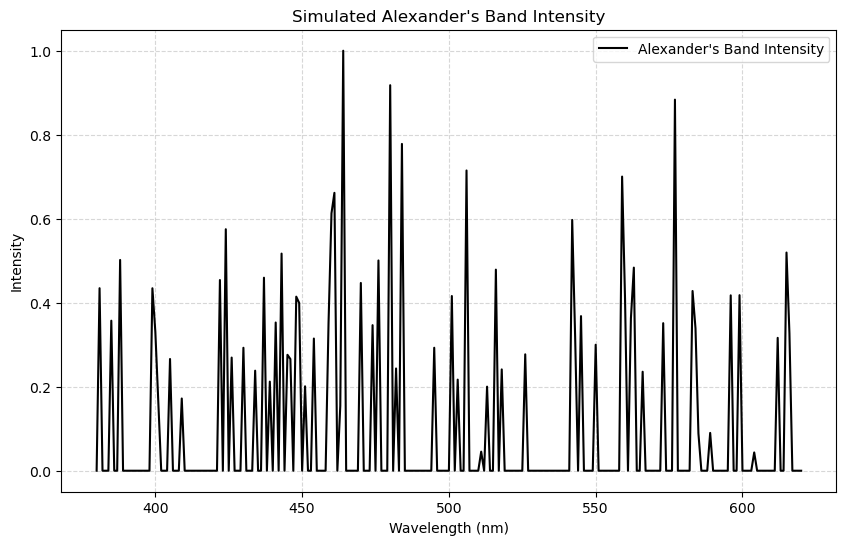

In [113]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_alexanders_band(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity):
    # Define parameters
    wavelengths = np.linspace(380, 620, 241)  # Wavelengths from 380 nm to 620 nm
    alexanders_band_intensity = np.zeros_like(wavelengths)
    for wavelength_index, wavelength in enumerate(wavelengths):
        for i in range(num_rays):
            ray_direction = np.random.uniform(-1, 1, size=3)
            ray_direction /= np.linalg.norm(ray_direction)

            # Importance sampling based on angle with zenith
            zenith_angle = np.arccos(ray_direction[2])  
            weight = np.sin(zenith_angle) 
            raindrop_index = np.random.choice(len(raindrop_coords))

            # Get raindrop position and size
            raindrop_position = np.append(raindrop_coords[raindrop_index], 0) 
            raindrop_radius = raindrop_sizes[raindrop_index]
            distance_to_intersection = np.dot(raindrop_position[:3], ray_direction)
            if distance_to_intersection <= raindrop_radius:
                cos_incidence_angle = distance_to_intersection / raindrop_radius
                cos_incidence_angle = np.clip(cos_incidence_angle, -1, 1)
                incidence_angle = np.arccos(cos_incidence_angle)

                # Simulate refraction (Snell's law)
                refraction_angle = np.arcsin(np.sin(incidence_angle) / refractive_index)
                deviation_angle = np.arcsin(np.sin(incidence_angle) - np.sin(refraction_angle))
                if 140 < np.degrees(incidence_angle) < 180:
                    intensity = (
                        violet_intensity if wavelength < 450 else
                        blue_intensity if wavelength < 485 else
                        cyan_intensity if wavelength < 500 else
                        green_intensity if wavelength < 570 else
                        yellow_intensity if wavelength < 590 else
                        orange_intensity if wavelength < 620 else
                        red_intensity
                    ) * deviation_angle * weight

                    # Accumulate intensity for each wavelength
                    alexanders_band_intensity[wavelength_index] += intensity

    # Normalize Alexander's band intensity
    max_intensity = np.max(alexanders_band_intensity)
    if max_intensity == 0:
        return wavelengths, alexanders_band_intensity
    alexanders_band_intensity /= max_intensity

    return wavelengths, alexanders_band_intensity

def plot_alexanders_band(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity):
    wavelengths, alexanders_band_intensity = simulate_alexanders_band(
        num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity)
    plt.figure(figsize=(10, 6))
    plt.plot(wavelengths, alexanders_band_intensity, color='black', label="Alexander's Band Intensity")

    # Add annotations
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Intensity')
    plt.title("Simulated Alexander's Band Intensity")
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.show()


num_rays = 1000 
area_size = 100
density = density_slider.value
median_diameter = 2 * slider_radius.value 
refractive_index = slider_refractive_index.value

violet_intensity = slider_violet.value
blue_intensity = slider_blue.value
cyan_intensity = slider_cyan.value
green_intensity = slider_green.value
yellow_intensity = slider_yellow.value
orange_intensity = slider_orange.value
red_intensity = slider_red.value

raindrop_coords, raindrop_sizes = generate_raindrop_distribution(density, area_size, median_diameter)

# Call the function to plot Alexander's band
plot_alexanders_band(num_rays, raindrop_coords, raindrop_sizes, refractive_index, violet_intensity, blue_intensity, cyan_intensity, green_intensity, yellow_intensity, orange_intensity, red_intensity)



In [49]:
import turtle
import random
import colorsys

def draw_sun(x, y, radius):
    turtle.up()
    turtle.goto(x, y)
    turtle.down()
    turtle.begin_fill()
    turtle.color("yellow")
    turtle.circle(radius)
    turtle.end_fill()

def draw_thundercloud(x, y, width, height):
    turtle.up()
    turtle.goto(x, y)
    turtle.down()
    turtle.begin_fill()
    turtle.color("gray")
    turtle.seth(225)
    turtle.circle(width, -90)
    turtle.circle(height, -90)
    turtle.circle(width, -90)
    turtle.circle(height, -90)
    turtle.end_fill()

def draw_raindrop(x, y, size):
    turtle.up()
    turtle.goto(x, y)
    turtle.down()
    turtle.dot(size, "blue")

def draw_one_color_arc(x, y, r, pensize, color):
    turtle.up()
    turtle.goto(x + r, y)
    turtle.down()
    turtle.seth(90)
    turtle.pensize(pensize)
    turtle.pencolor(color)
    turtle.circle(r, 180)

# Set up the screen
turtle.setup(700, 700)
turtle.bgcolor("light blue")
turtle.title("Rainbow")

# Draw sun
draw_sun(-200, 200, 50)

# Draw thundercloud
draw_thundercloud(0, 250, 80, 50)
draw_thundercloud(100, 250, 80, 50)

# Draw raindrops
turtle.speed(0)
turtle.hideturtle()
for _ in range(50):
    x = random.randint(-300, 300)
    y = random.randint(-300, 100)
    size = 5  # Size of raindrops
    draw_raindrop(x, y, size)

# Hide the turtle
turtle.hideturtle()

# Draw rainbow
radius = 300
penwidth = 20
num_colors = 6
hue = 0
for i in range(num_colors):
    (r, g, b) = colorsys.hsv_to_rgb(hue, 1, 1)
    draw_one_color_arc(0, -100, radius, penwidth, (r, g, b))
    radius -= (penwidth - 1)
    hue += 0.9 / num_colors

# Keep the window open
turtle.done()
